In [1]:
# attention:
# install neded libs:
# python -m pip install --upgrade pip
# pip install --upgrade --user numpy scipy pandas matplotlib sklearn jupyter tensorflow-gpu keras opencv-python
# install CUDA for the GPU
# start with: 0. go to dir inside some terminal with proper PATH 1. "$ jupyter notebook"

import os
import cv2
import re
import random
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.models import Sequential 
from keras import layers, models, optimizers, utils
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
img_width = 150
img_height = 150
# adapt those paths to the current directories
#C:\Users\mpe\Desktop\MarcelsFolder\coding\machineLearningWithPython\3rdSession\test1
TRAIN_DIR = 'C:/Users/mpe/Desktop/MarcelsFolder/coding/machineLearningWithPython/3rdSession/train/'
TEST_DIR = 'C:/Users/mpe/Desktop/MarcelsFolder/coding/machineLearningWithPython/3rdSession/test1/'

train_images_dogs_cats = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset
test_images_dogs_cats = [TEST_DIR+i for i in os.listdir(TEST_DIR)]


In [3]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [4]:
train_images_dogs_cats.sort(key=natural_keys)
train_images_dogs_cats = train_images_dogs_cats[0:1300] + train_images_dogs_cats[12500:13800] 

test_images_dogs_cats.sort(key=natural_keys)

In [5]:
def prepare_data(list_of_images):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    x = [] # images as arrays
    y = [] # labels
    
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(image), (img_width,img_height), interpolation=cv2.INTER_CUBIC))
    
    for i in list_of_images:
        if 'dog' in i:
            y.append(1)
        elif 'cat' in i:
            y.append(0)
        #else:
            #print('neither cat nor dog name present in images')
            
    return x, y

In [6]:
X, Y = prepare_data(train_images_dogs_cats)
print(K.image_data_format())

channels_last


In [7]:
# First split the data in two sets, 80% for training, 20% for Val/Test)
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2, random_state=1)

In [8]:
nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)
batch_size = 16

In [9]:
model = Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()


W0717 09:22:02.774564 24316 deprecation_wrapper.py:119] From c:\users\mpe\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 09:22:02.806480 24316 deprecation_wrapper.py:119] From c:\users\mpe\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 09:22:02.822437 24316 deprecation_wrapper.py:119] From c:\users\mpe\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 09:22:02.838395 24316 deprecation_wrapper.py:119] From c:\users\mpe\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please us

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [10]:
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow(np.array(X_train)/255, Y_train, batch_size=batch_size)
validation_generator = val_datagen.flow(np.array(X_val)/255, Y_val, batch_size=batch_size)


In [11]:
train_generator

In [12]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=500,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/500
130/130 [==============================] - 28s 214ms/step - loss: 0.7173 - acc: 0.5139 - val_loss: 0.6865 - val_acc: 0.5488
Epoch 2/500
130/130 [==============================] - 27s 211ms/step - loss: 0.6738 - acc: 0.6000 - val_loss: 0.6541 - val_acc: 0.5952
Epoch 3/500
130/130 [==============================] - 27s 211ms/step - loss: 0.6364 - acc: 0.6606 - val_loss: 0.6265 - val_acc: 0.6667
Epoch 4/500
130/130 [==============================] - 28s 212ms/step - loss: 0.6092 - acc: 0.6793 - val_loss: 0.6178 - val_acc: 0.6310
Epoch 5/500
130/130 [==============================] - 27s 211ms/step - loss: 0.5851 - acc: 0.7053 - val_loss: 0.5838 - val_acc: 0.7123
Epoch 6/500
130/130 [==============================] - 27s 210ms/step - loss: 0.5580 - acc: 0.7188 - val_loss: 0.5507 - val_acc: 0.7183
Epoch 7/500
130/130 [==============================] - 27s 208ms/step - loss: 0.5448 - acc: 0.7389 - val_loss: 0.5269 - val_acc: 0.7321
Epoch 8/500
130/130 [===========================

130/130 [==============================] - 26s 201ms/step - loss: 0.3722 - acc: 0.8409 - val_loss: 0.4705 - val_acc: 0.8016
Epoch 61/500
130/130 [==============================] - 26s 201ms/step - loss: 0.4015 - acc: 0.8529 - val_loss: 0.5744 - val_acc: 0.7778
Epoch 62/500
130/130 [==============================] - 26s 201ms/step - loss: 0.3758 - acc: 0.8438 - val_loss: 0.5023 - val_acc: 0.7778
Epoch 63/500
130/130 [==============================] - 26s 201ms/step - loss: 0.3758 - acc: 0.8452 - val_loss: 0.5048 - val_acc: 0.7560
Epoch 64/500
130/130 [==============================] - 26s 202ms/step - loss: 0.3934 - acc: 0.8351 - val_loss: 0.4917 - val_acc: 0.7817
Epoch 65/500
130/130 [==============================] - 26s 201ms/step - loss: 0.3921 - acc: 0.8380 - val_loss: 0.5984 - val_acc: 0.7976
Epoch 66/500
130/130 [==============================] - 26s 202ms/step - loss: 0.3625 - acc: 0.8510 - val_loss: 0.5324 - val_acc: 0.7937
Epoch 67/500
130/130 [==============================] 

Epoch 120/500
130/130 [==============================] - 26s 201ms/step - loss: 0.4217 - acc: 0.8380 - val_loss: 0.5520 - val_acc: 0.7440
Epoch 121/500
130/130 [==============================] - 26s 201ms/step - loss: 0.3944 - acc: 0.8442 - val_loss: 0.6931 - val_acc: 0.7698
Epoch 122/500
130/130 [==============================] - 26s 202ms/step - loss: 0.3917 - acc: 0.8538 - val_loss: 0.5081 - val_acc: 0.7778
Epoch 123/500
130/130 [==============================] - 26s 201ms/step - loss: 0.3581 - acc: 0.8601 - val_loss: 0.4941 - val_acc: 0.7956
Epoch 124/500
130/130 [==============================] - 26s 201ms/step - loss: 0.3702 - acc: 0.8548 - val_loss: 1.0926 - val_acc: 0.7024
Epoch 125/500
130/130 [==============================] - 26s 201ms/step - loss: 0.3685 - acc: 0.8447 - val_loss: 0.6506 - val_acc: 0.7798
Epoch 126/500
130/130 [==============================] - 26s 201ms/step - loss: 0.3592 - acc: 0.8505 - val_loss: 0.7463 - val_acc: 0.7778
Epoch 127/500
130/130 [===========

130/130 [==============================] - 26s 201ms/step - loss: 0.4461 - acc: 0.8135 - val_loss: 0.5404 - val_acc: 0.8036
Epoch 180/500
130/130 [==============================] - 26s 201ms/step - loss: 0.4118 - acc: 0.8337 - val_loss: 1.0441 - val_acc: 0.7778
Epoch 181/500
130/130 [==============================] - 26s 202ms/step - loss: 0.4225 - acc: 0.8293 - val_loss: 0.5962 - val_acc: 0.7718
Epoch 182/500
130/130 [==============================] - 26s 202ms/step - loss: 0.4465 - acc: 0.8091 - val_loss: 0.4962 - val_acc: 0.7817
Epoch 183/500
130/130 [==============================] - 26s 201ms/step - loss: 0.4150 - acc: 0.8375 - val_loss: 0.5201 - val_acc: 0.7996
Epoch 184/500
130/130 [==============================] - 26s 201ms/step - loss: 0.4657 - acc: 0.8389 - val_loss: 0.5215 - val_acc: 0.7976
Epoch 185/500
130/130 [==============================] - 26s 201ms/step - loss: 0.4578 - acc: 0.8178 - val_loss: 0.5306 - val_acc: 0.7956
Epoch 186/500
130/130 [=========================

130/130 [==============================] - 26s 202ms/step - loss: 0.4541 - acc: 0.8240 - val_loss: 0.4889 - val_acc: 0.7837
Epoch 239/500
130/130 [==============================] - 26s 202ms/step - loss: 0.4783 - acc: 0.8125 - val_loss: 0.4878 - val_acc: 0.7718
Epoch 240/500
130/130 [==============================] - 26s 200ms/step - loss: 0.4828 - acc: 0.8091 - val_loss: 0.5432 - val_acc: 0.7738
Epoch 241/500
130/130 [==============================] - 26s 201ms/step - loss: 0.4586 - acc: 0.8034 - val_loss: 0.5374 - val_acc: 0.7401
Epoch 242/500
130/130 [==============================] - 26s 202ms/step - loss: 0.4487 - acc: 0.8337 - val_loss: 0.5878 - val_acc: 0.7976
Epoch 243/500
130/130 [==============================] - 26s 201ms/step - loss: 0.4718 - acc: 0.8120 - val_loss: 0.5748 - val_acc: 0.7877
Epoch 244/500
130/130 [==============================] - 26s 201ms/step - loss: 0.4775 - acc: 0.8058 - val_loss: 0.5615 - val_acc: 0.7917
Epoch 245/500
130/130 [=========================

130/130 [==============================] - 26s 201ms/step - loss: 0.4782 - acc: 0.8005 - val_loss: 0.8608 - val_acc: 0.7897
Epoch 298/500
130/130 [==============================] - 26s 202ms/step - loss: 0.4937 - acc: 0.8269 - val_loss: 1.0975 - val_acc: 0.7520
Epoch 299/500
130/130 [==============================] - 26s 202ms/step - loss: 0.5162 - acc: 0.8240 - val_loss: 0.5672 - val_acc: 0.7659
Epoch 300/500
130/130 [==============================] - 26s 202ms/step - loss: 0.4750 - acc: 0.8149 - val_loss: 0.5893 - val_acc: 0.7321
Epoch 301/500
130/130 [==============================] - 26s 201ms/step - loss: 0.4357 - acc: 0.8212 - val_loss: 0.5536 - val_acc: 0.7639
Epoch 302/500
130/130 [==============================] - 26s 202ms/step - loss: 0.4547 - acc: 0.8130 - val_loss: 0.5813 - val_acc: 0.8056
Epoch 303/500
130/130 [==============================] - 26s 203ms/step - loss: 0.4879 - acc: 0.8231 - val_loss: 0.6621 - val_acc: 0.7718
Epoch 304/500
130/130 [=========================

130/130 [==============================] - 26s 203ms/step - loss: 0.5067 - acc: 0.7971 - val_loss: 1.0428 - val_acc: 0.7440
Epoch 357/500
130/130 [==============================] - 26s 202ms/step - loss: 0.5343 - acc: 0.8111 - val_loss: 0.7469 - val_acc: 0.7500
Epoch 358/500
130/130 [==============================] - 26s 203ms/step - loss: 0.5449 - acc: 0.7923 - val_loss: 1.3410 - val_acc: 0.7460
Epoch 359/500
130/130 [==============================] - 26s 202ms/step - loss: 0.5901 - acc: 0.7750 - val_loss: 0.5713 - val_acc: 0.7619
Epoch 360/500
130/130 [==============================] - 26s 203ms/step - loss: 0.5852 - acc: 0.7736 - val_loss: 0.6074 - val_acc: 0.6905
Epoch 361/500
130/130 [==============================] - 26s 202ms/step - loss: 0.5475 - acc: 0.7721 - val_loss: 0.5292 - val_acc: 0.7877
Epoch 362/500
130/130 [==============================] - 26s 201ms/step - loss: 0.5309 - acc: 0.7822 - val_loss: 0.5660 - val_acc: 0.7321
Epoch 363/500
130/130 [=========================

130/130 [==============================] - 26s 203ms/step - loss: 0.6045 - acc: 0.7370 - val_loss: 0.6513 - val_acc: 0.6806
Epoch 416/500
130/130 [==============================] - 26s 202ms/step - loss: 0.6767 - acc: 0.7226 - val_loss: 0.6749 - val_acc: 0.5794
Epoch 417/500
130/130 [==============================] - 26s 202ms/step - loss: 0.6272 - acc: 0.7144 - val_loss: 0.6945 - val_acc: 0.6429
Epoch 418/500
130/130 [==============================] - 26s 202ms/step - loss: 1.0713 - acc: 0.7091 - val_loss: 0.5464 - val_acc: 0.7500
Epoch 419/500
130/130 [==============================] - 26s 203ms/step - loss: 0.6274 - acc: 0.7538 - val_loss: 0.5487 - val_acc: 0.7460
Epoch 420/500
130/130 [==============================] - 26s 202ms/step - loss: 0.7574 - acc: 0.7072 - val_loss: 0.8119 - val_acc: 0.7560
Epoch 421/500
130/130 [==============================] - 26s 202ms/step - loss: 0.6375 - acc: 0.6841 - val_loss: 0.7896 - val_acc: 0.7520
Epoch 422/500
130/130 [=========================

130/130 [==============================] - 26s 202ms/step - loss: 8.0044 - acc: 0.4981 - val_loss: 7.4651 - val_acc: 0.5317
Epoch 475/500
130/130 [==============================] - 26s 203ms/step - loss: 7.9691 - acc: 0.5000 - val_loss: 8.4140 - val_acc: 0.4722
Epoch 476/500
130/130 [==============================] - 26s 203ms/step - loss: 7.9505 - acc: 0.5014 - val_loss: 7.7814 - val_acc: 0.5119
Epoch 477/500
130/130 [==============================] - 26s 202ms/step - loss: 7.8395 - acc: 0.5087 - val_loss: 8.1610 - val_acc: 0.4881
Epoch 478/500
130/130 [==============================] - 26s 202ms/step - loss: 7.9306 - acc: 0.5034 - val_loss: 7.8763 - val_acc: 0.5060
Epoch 479/500
130/130 [==============================] - 26s 202ms/step - loss: 7.9530 - acc: 0.5014 - val_loss: 8.3191 - val_acc: 0.4782
Epoch 480/500
130/130 [==============================] - 26s 203ms/step - loss: 8.0025 - acc: 0.4986 - val_loss: 7.6865 - val_acc: 0.5179
Epoch 481/500
130/130 [=========================

In [28]:
model.save_weights('model_weights.h5')
model.save('model_keras.h5')
a = model.predict_classes(np.array(X_val)/255)
np.mean(np.reshape(np.array(Y_val),[-1,1]) == a)

0.4980769230769231

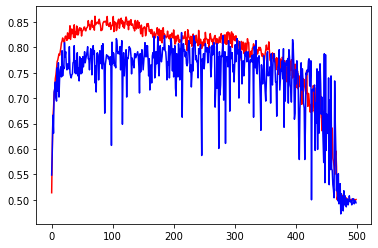

In [29]:
plt.plot(history.history['acc'],color = 'red')
plt.plot(history.history['val_acc'],color = 'blue')


In [30]:
# Looking at some of the mistakes
y_pred = model.predict_classes(np.array(X_val)/255)
ind = np.array(np.where((np.reshape(np.array(Y_val),[-1,1]) != y_pred) & (y_pred == 0)))

#y_pred # to check the result


0
[1]


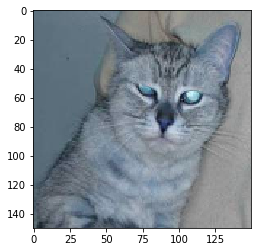

In [31]:
#k = ind[0,2]
k = 222 # make it fixed, because ind is [] and has therefore no values
plt.imshow(X_val[k])
print(Y_val[k])
print(y_pred[k])